# Showcase of constrained optimization

This notebook demonstrates how ProcessOptimizer can provide suggestions for experiments that are forced to obey a sum constraint for some (or all) of its factors. This scenario is typically relevant when you work with mixtures, such as A + B + C must sum to 1.00 kg. For such a constraint to be meaningful, the factors that are part of the constraint must have the same units. Furthermore, with the present implementation of sum constraints it is also a requirement that the constrained factors are continuous numbers.


In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.cm as mcolormap
from ProcessOptimizer import Optimizer
from ProcessOptimizer.plots import plot_objective, plot_objective_1d
from ProcessOptimizer.utils import expected_minimum
from ProcessOptimizer.space.constraints import SumEquals

np.random.seed(42)

In [2]:
# Build a space for experimentation
dimensions = [(0.0, 10.0), (0.0, 10.0), (0.0, 10.0), (0, 2)]
labels = ["Factor A", "Factor B", "Factor C", "Factor D"]

# Define constraint for this system in the form of having A, B and C sum to a
# total of some value we pick, and D can vary freely between its limits
constraints = [SumEquals(dimensions=[0, 1, 2], value=5)]

# Build optimizer
opt = Optimizer(
    dimensions,
    lhs=False,
    acq_func="EI",
    n_initial_points=50,
    random_state=42,
    acq_func_kwargs={'xi':0.1},
)

# Apply our desired constraint before we ask for experiment suggestions
opt.set_constraints(constraints)
# Get first 50 points that respect the constraints A + B + C = 5
next_x_5 = opt.ask(50)

To start, we will demonstrate how Process Optimizer draws initial points that respect the constraint and are distributed in a space-filling way.

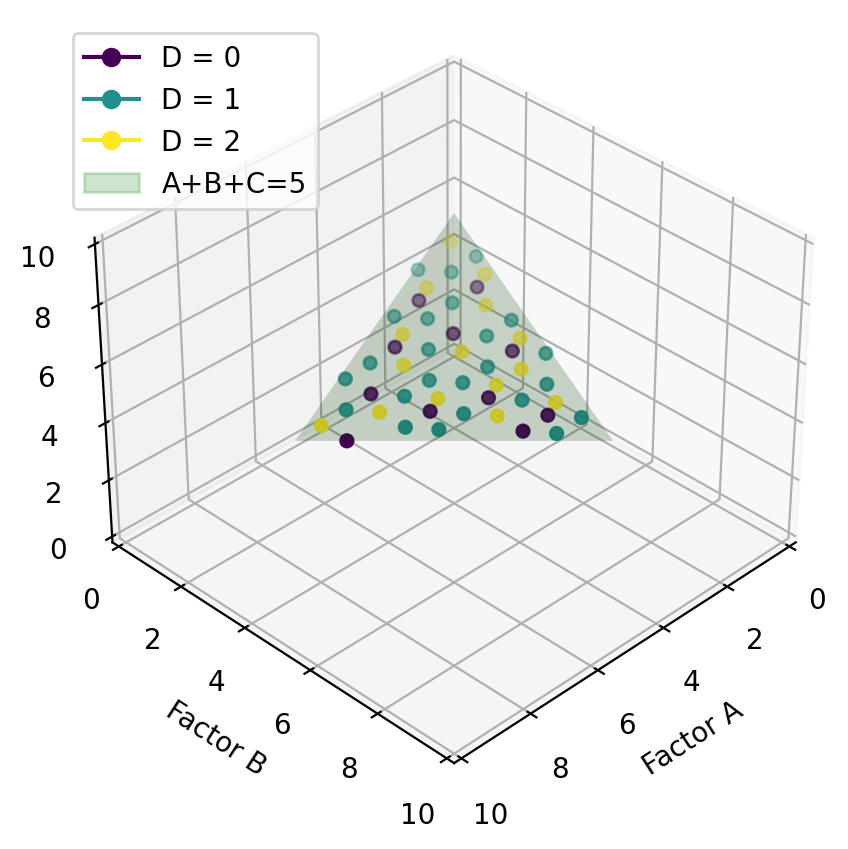

In [3]:
# Show the suggest experiment locations in the constrained factors
samples = np.array(next_x_5)
fig = plt.figure(figsize=(5, 5), dpi=200, facecolor="w")
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=35, azim=45)
ax.scatter(samples[:,0], samples[:,1], samples[:,2], c=samples[:,3])

# Cosmetics
ax.set(
    xlabel=labels[0],
    ylabel=labels[1],
    zlabel=labels[2],
    xlim=(opt.space.bounds[0][0],opt.space.bounds[0][1]),
    ylim=(opt.space.bounds[1][0],opt.space.bounds[1][1]),
    zlim=(opt.space.bounds[2][0],opt.space.bounds[2][1]),
)
# Add a plane showing the constraint clearly
xx = np.array([0, 0, constraints[0].value])
yy = np.array([0, constraints[0].value, 0])
zz = np.array([constraints[0].value, 0, 0])
ax.plot_trisurf(xx, yy, zz, color="green", alpha=0.2)

# Add a legend
cmap = mcolormap.get_cmap('viridis')
D0_icon = mlines.Line2D([], [], color=cmap(0), marker="o", label="D = 0")
D1_icon = mlines.Line2D([], [], color=cmap(0.5), marker="o", label="D = 1")
D2_icon = mlines.Line2D([], [], color=cmap(1.0), marker="o", label="D = 2")
constraint_patch = mpatches.Patch(color="green", alpha=0.2, label="A+B+C={}".format(constraints[0].value))
l = ax.legend(handles=[D0_icon, D1_icon, D2_icon, constraint_patch], loc="upper left")

Note how the runs for each setting of D are distributed in a space-filling way so that if you only carried out these runs, then you would still expect to get a reasonable model of your system. This is coded into the sampling on purpose and to provide some background on this design choice, we also generate a plot to show how the distribution of D would look if it was random:

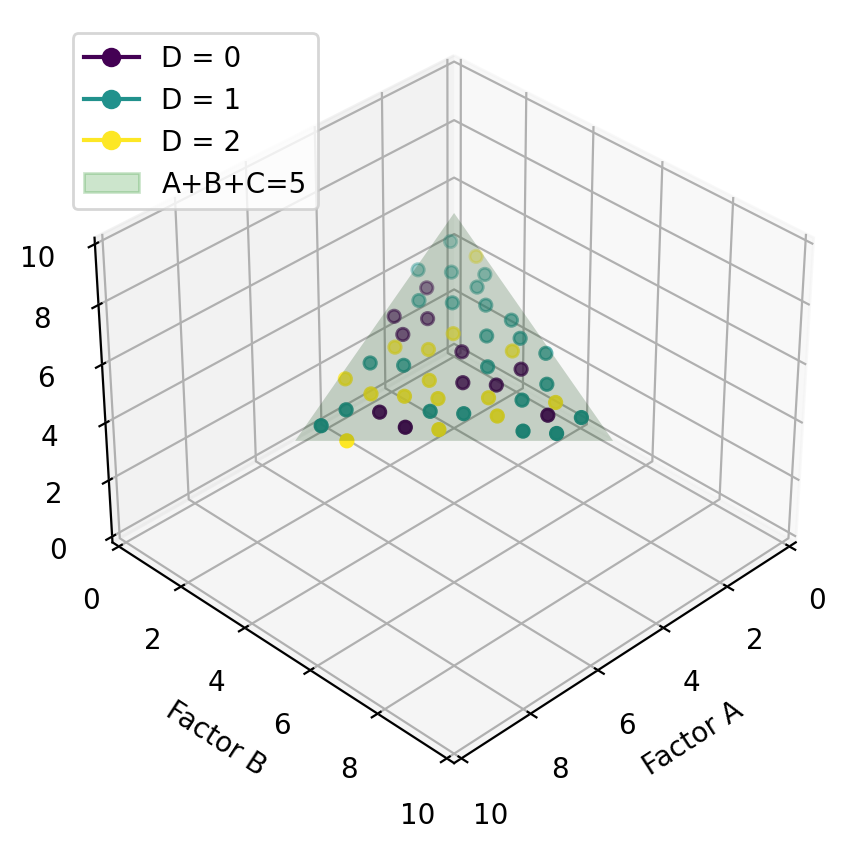

In [4]:
samples = np.array(next_x_5)
fig = plt.figure(figsize=(5, 5), dpi=200, facecolor="w")
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=35, azim=45)
rng = np.random.default_rng(seed=42)
rng.shuffle(samples[:,3])
ax.scatter(samples[:,0], samples[:,1], samples[:,2], c=samples[:,3])

# Cosmetics
ax.set(
    xlabel=labels[0],
    ylabel=labels[1],
    zlabel=labels[2],
    xlim=(opt.space.bounds[0][0],opt.space.bounds[0][1]),
    ylim=(opt.space.bounds[1][0],opt.space.bounds[1][1]),
    zlim=(opt.space.bounds[2][0],opt.space.bounds[2][1]),
)
# Add a plane showing the constraint clearly
xx = np.array([0, 0, constraints[0].value])
yy = np.array([0, constraints[0].value, 0])
zz = np.array([constraints[0].value, 0, 0])
ax.plot_trisurf(xx, yy, zz, color="green", alpha=0.2)

# Add a legend
cmap = mcolormap.get_cmap('viridis')
D0_icon = mlines.Line2D([], [], color=cmap(0), marker="o", label="D = 0")
D1_icon = mlines.Line2D([], [], color=cmap(0.5), marker="o", label="D = 1")
D2_icon = mlines.Line2D([], [], color=cmap(1.0), marker="o", label="D = 2")
constraint_patch = mpatches.Patch(color="green", alpha=0.2, label="A+B+C={}".format(constraints[0].value))
l = ax.legend(handles=[D0_icon, D1_icon, D2_icon, constraint_patch], loc="upper left")

Note the clear "clustering" of the yellow D = 2 points in the lower half of the constrained triangle. This leads to a worse model when D = 2 in the upper half of the constrained triangle, which is not desirable. Similar problems are also clear for the blue D = 0 points.

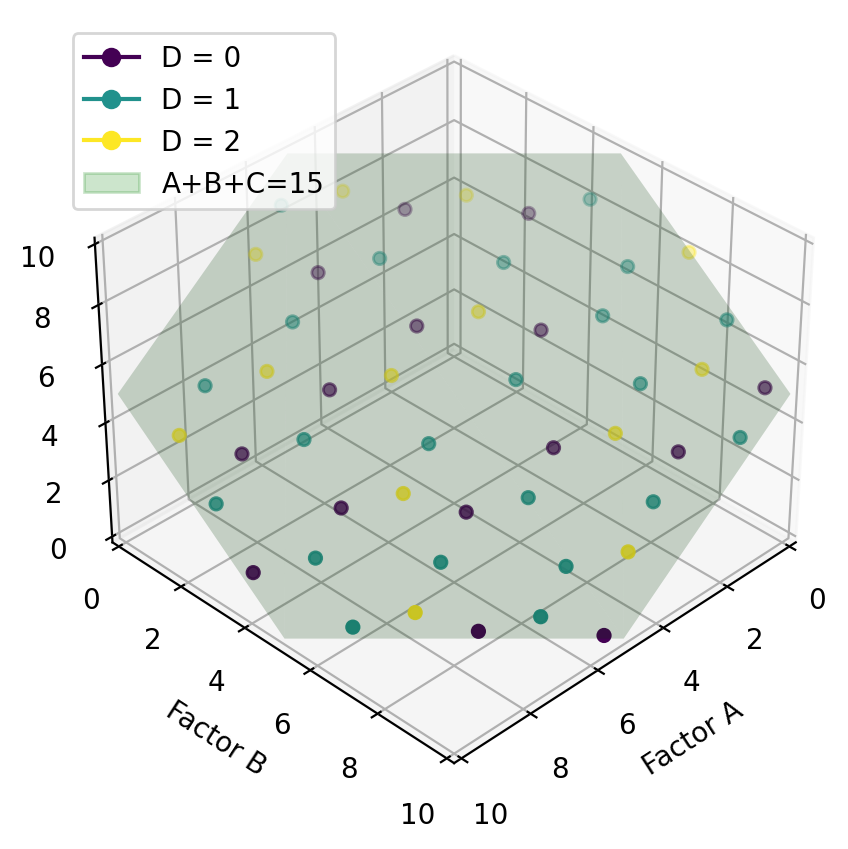

In [5]:
# Set a new constraint for a second plot example
constraints = [SumEquals(dimensions=[0, 1, 2], value=15)]
# Apply our desired constraint before we ask for experiment suggestions
opt.set_constraints(constraints)
# Get first 50 points that respect the constraints A + B + C = 15
next_x_15 = opt.ask(50)

samples = np.array(next_x_15)
fig = plt.figure(figsize=(5, 5), dpi=200, facecolor="w")
ax = fig.add_subplot(111,projection='3d')
ax.view_init(elev=35, azim=45)
ax.scatter(samples[:,0], samples[:,1], samples[:,2], c=samples[:,3])

# Cosmetics
ax.set(
    xlabel=labels[0],
    ylabel=labels[1],
    zlabel=labels[2],
    xlim=(opt.space.bounds[0][0],opt.space.bounds[0][1]),
    ylim=(opt.space.bounds[1][0],opt.space.bounds[1][1]),
    zlim=(opt.space.bounds[2][0],opt.space.bounds[2][1]),
)
# Add a plane showing the constraint clearly
xx = [10, 10, 5, 5, 0, 0]
yy = [0, 5, 10, 0, 5, 10]
zz = [5, 0, 0, 10, 10, 5]
ax.plot_trisurf(xx, yy, zz, color="green", alpha=0.2)

# Add a legend
cmap = mcolormap.get_cmap('viridis')
D0_icon = mlines.Line2D([], [], color=cmap(0), marker="o", label="D = 0")
D1_icon = mlines.Line2D([], [], color=cmap(0.5), marker="o", label="D = 1")
D2_icon = mlines.Line2D([], [], color=cmap(1.0), marker="o", label="D = 2")
constraint_patch = mpatches.Patch(color="green", alpha=0.2, label="A+B+C={}".format(constraints[0].value))
l = ax.legend(handles=[D0_icon, D1_icon, D2_icon, constraint_patch], loc="upper left")

Next we will run a simulated experiment where we gather some initial data, build a model and enter the iterative optimization loop where we continually ask for one new experiment at a time, that still obeys the constraints. We stop once we get a single result that is better than our goal.

In [6]:
# The model system to use during our iterative experiment
# it is designed to operate on the space:
# [(-3.0, 3.0), (-3.0, 3.0), ..., ...] (ignores all higher dimensions)

# Set the noise level
noise = 0.1
# Define the scoring function and seed it for reproducible results
def score(x, rng=np.random.default_rng(seed=42), noise_std=noise):
    y = (
        3*(1- x[0])**2 * np.exp(-x[0]**2 - (x[1]+1)**2)
        - 10*(x[0]/5 - x[0]**3 - x[1]**5) * np.exp(-x[0]**2 - x[1]**2)
        - 1/3*np.exp(-(x[0]+1)**2 - x[1]**2)
    )
    return y + rng.normal(scale=noise_std)

In [7]:
# Define the space
dimensions = [(-3.0, 3.0), (-2.0, 2.0), (-3.0, 3.0), (0, 4)]
labels = ["Factor A", "Factor B", "Factor C", "Factor D"]
# Set the optimization goal. We stop when we see a score better than this.
goal = -5

# Define constraint for this system in the form of having A, B and C sum to a
# total of some value we pick, and D can vary freely between its limits
constraints = [SumEquals(dimensions=[0, 1, 2], value=2)]

# Build optimizer
opt = Optimizer(
    dimensions,
    lhs=False,
    acq_func="EI",
    n_initial_points=10,
    random_state=42,
    acq_func_kwargs={'xi': 0.1},
)
# Apply the constraint
opt.set_constraints(constraints)

In [8]:
# Get first 10 points that respect the constraints A + B + C = 0
next_x = opt.ask(10)
y = []
for x in next_x:
    y.append(score(x[:2]))
# Give results to the model
res = opt.tell(next_x, y)
x = next_x

In [9]:
# Enter the iterative experimenation loop
for i in range(40):
    # Calculate desired further improvement at this stage
    xi = np.abs(np.min(y) - goal)
    # Update the optimizer
    opt.acq_func_kwargs={"xi": xi}
    opt.update_next()
    # Ask for the next experiment
    next_x = opt.ask(1)
    x.append(next_x)
    # Get a "measurement" at the next experiment
    y.append(score(next_x[:2]))
    # Update the model with the newest data
    res = opt.tell(next_x, y[-1])
    # Stop if we are done
    if any(np.array(y) < goal):
        print("Result obtained that meets desired goal, y = {}".format(min(y)))
        print("Optimization completed after {} runs.".format(len(x)))
        break

Result obtained that meets desired goal, y = -5.290940586124838
Optimization completed after 21 runs.


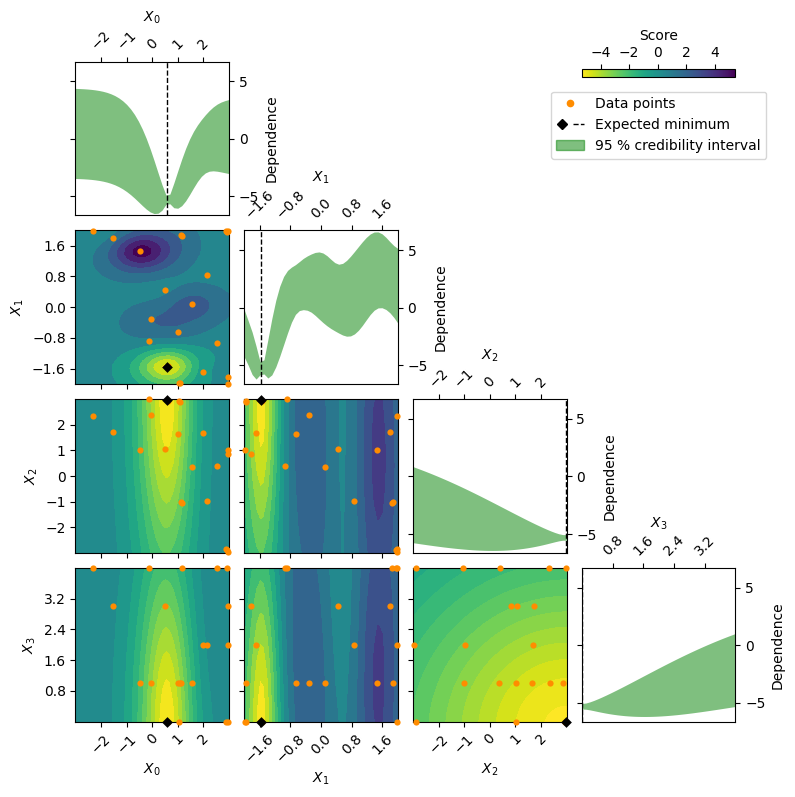

In [10]:
# Plot the result
plot_objective(res, show_confidence=True, pars="expected_minimum")

# Gather information on the found solution
result_location, [result_value, result_std] = expected_minimum(res, return_std=True)

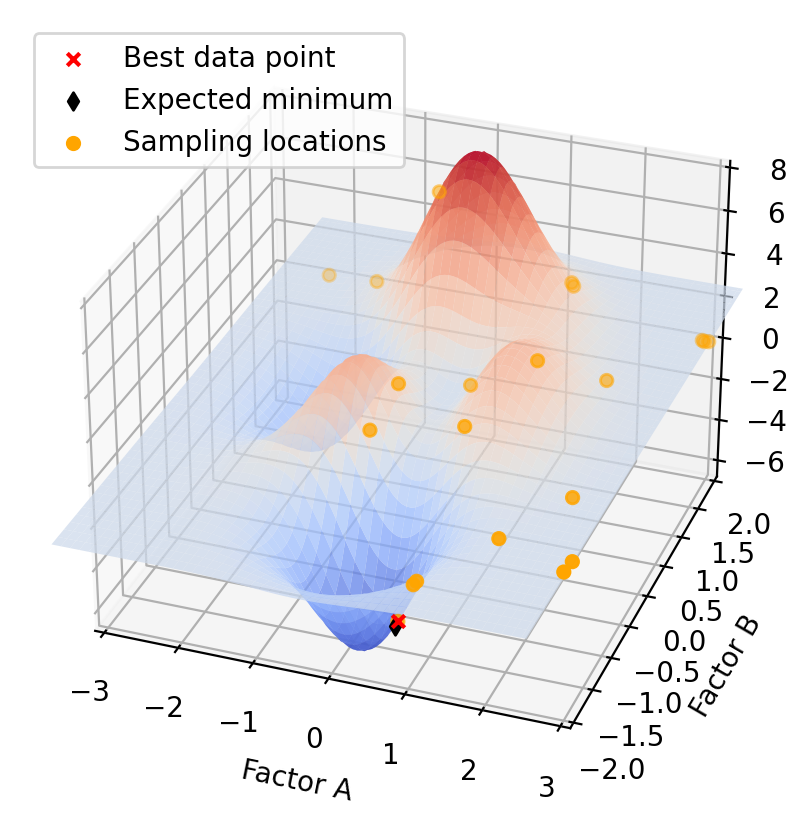

In [11]:
# Visualize the true system and the identified solution
xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
zz = np.array([score([x, y], noise_std=0) for x, y in zip(xx, yy)])

fig = plt.figure(figsize=(5, 5), dpi=200)
ax = fig.add_subplot(111, projection='3d', computed_zorder=False)
ax.view_init(30, -70)
h = ax.plot_surface(xx, yy, zz, cmap=mcolormap.coolwarm, alpha=0.75, zorder=0)
# Cosmetics
ax.set(
    xlabel=labels[0],
    ylabel=labels[1],
    zlabel="Score",
    xlim=(opt.space.bounds[0][0],opt.space.bounds[0][1]),
    ylim=(opt.space.bounds[1][0],opt.space.bounds[1][1]),
    zlim=(-6.5,8),
)

# Location of best data point
x_solution = x[np.argmin(y)]

# Show location of the data point that met the goal
ax.scatter(
    x_solution[0],
    x_solution[1],
    score([x_solution[0], x_solution[1]], noise_std=0),
    c="red",
    marker="x",
    zorder=5,
    label="Best data point",
)
# Show location of expected minimum
ax.scatter(
    result_location[0],
    result_location[1],
    score([result_location[0], result_location[1]], noise_std=0),
    c="black",
    marker="d",
    zorder=4,
    label="Expected minimum",
)
# Show where data was collected
xx = np.array(x)
yy = np.array(y)
ax.scatter(
    xx[:,0],
    xx[:,1],
    score([xx[:,0], xx[:,1]], noise_std=0),
    c="orange",
    marker="o",
    zorder=3,
    label="Sampling locations",
)

# Add a legend
res_icon = mlines.Line2D([], [], color="red", marker="x", label="Best data point")
EM_icon = mlines.Line2D([], [], color="black", marker="d", label="Expected minimum")
data_icon = mlines.Line2D([], [], color="orange", marker="o", label="Data")
l = ax.legend(loc="upper left")